<a href="https://colab.research.google.com/github/wall1350/ai_2022/blob/main/AI_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's install Tensorflow 2.0:
!pip install -q tensorflow==2.5.0

# And verify that it is now in its latest version:
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 454.3 MB 20 kB/s 
     |████████████████████████████████| 132 kB 82.0 MB/s 
     |████████████████████████████████| 462 kB 56.9 MB/s 
     |████████████████████████████████| 14.8 MB 61.3 MB/s 
     |████████████████████████████████| 1.2 MB 53.9 MB/s 
     |████████████████████████████████| 4.0 MB 49.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
2.5.0


## Importing the dataset

In [ ]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean # importing mean()
iris = sns.load_dataset("iris")

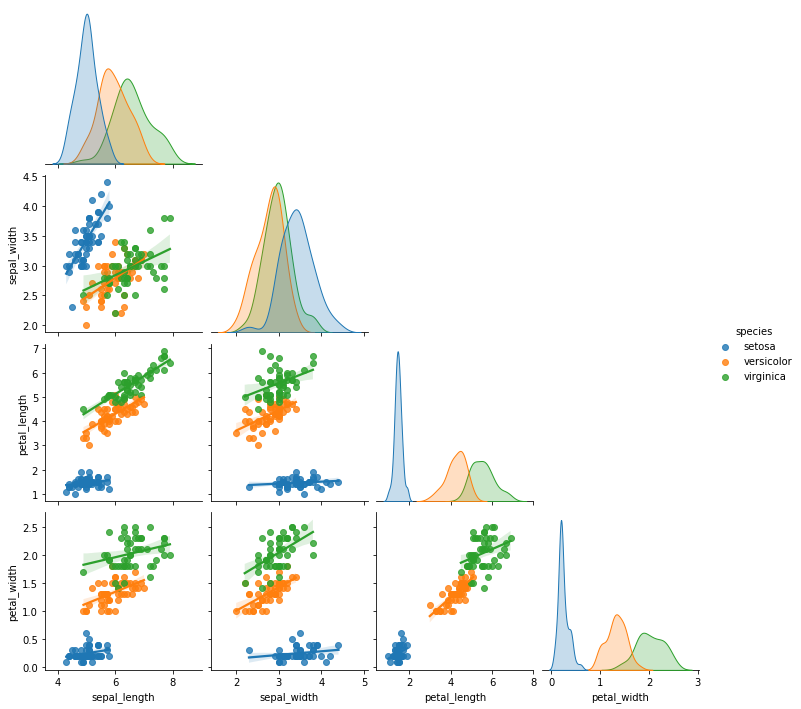

In [ ]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

### KNN (train and test)


In [ ]:
seed = 109598011
score_list = list()
train = iris.sample(frac=0.7, random_state=np.random.randint(seed)) # random state is a seed value
test = iris.drop(train.index)

X_train = train.drop(labels='species', axis=1)
y_train = train.species
X_test = test.drop(labels='species', axis=1)
y_test = test.species

for count in range(0,10):
  
  # print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
  K = 7 # input by user
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train,y_train)
  score_list.append(knn.score(X_test,y_test))

print("K=",K,mean(score_list))

K= 7 1.0


### get train set , validation set and test set

In [ ]:

for K in range(3,12,2):
  train = iris.sample(frac=0.6, random_state=np.random.randint(seed)) # random state is a seed value
  val = iris.drop(train.index).sample(frac=0.5, random_state=np.random.randint(seed))
  test = iris.drop(train.index).drop(val.index)

  X_train = train.drop(labels='species', axis=1)
  y_train = train.species

  X_val = val.drop(labels='species', axis=1)
  y_val = val.species

  X_test = test.drop(labels='species', axis=1)
  y_test = test.species
  score_list = list()
  # print("size:",X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

  for count in range(0,10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_val,y_val))
  print("validate socore when K=",K,mean(score_list))

K=11
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)

print("test socore when K=",K,knn.score(X_test,y_test))

validate socore when K= 3 1.0
validate socore when K= 5 1.0
validate socore when K= 7 0.9666666666666667
validate socore when K= 9 0.9333333333333333
validate socore when K= 11 0.9
test socore when K= 11 0.8666666666666667
